## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    
    
</ol>



## Набор данных для последнего ДЗ

- COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

- Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset

## Дополнительные материалы

<ol>
    <li>www.tensorflow.org/api_docs</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/</li>
    <li>https://www.tensorflow.org/tutorials/keras/classification</li>
    <li>Singh P., Manure A. - Learn TensorFlow 2.0 - 2020</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.4.0
TensorFlow 2.0 Hello World


In [3]:
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [4]:
from tensorflow import keras
from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import seaborn as sns

In [5]:
def evaluate_preds(true_values, pred_values, save=False, vis=True):
    """Оценка качества модели и график preds vs true"""
    if vis:
        print("R2:\t" + str(np.round(r2(true_values, pred_values), 5)) + "\n" +
              "RMSE:\t" + str(np.round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
              "MSE:\t" + str(np.round(mse(true_values, pred_values), 3)))
        
        plt.figure(figsize=(8,8))
        
        sns.scatterplot(x=pred_values, y=true_values)
        plt.plot([0, np.max(pred_values)], [0, np.max(true_values)], linestyle='--', color='black')  # диагональ, где true_values = pred_values
        
        plt.xlabel('Predicted values')
        plt.ylabel('True values')
        plt.title('True vs Predicted values')
        
        if save == True:
            plt.savefig(REPORTS_FILE_PATH + 'report.png')
        plt.show()

    return np.round(r2(true_values, pred_values), 5), np.round(np.sqrt(mse(true_values, pred_values)), 3), np.round(mse(true_values, pred_values), 3)

In [5]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
#X_train.reshape(13,339)
X_train.shape

(339, 13)

In [8]:
y_test.shape

(167,)

# Тестовый прогон

In [8]:
model_test = models.Sequential()
model_test.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_test.add(layers.Dense(64, activation='relu'))
model_test.add(layers.Dense(1))

In [26]:
model_test.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_test.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])

hist1=model_test.fit(X_train, y_train, epochs=5)

Epoch 1/5
11/11 [==============================] - 0s 2ms/step - loss: 267.1584 - mean_absolute_error: 13.2503
Epoch 2/5
11/11 [==============================] - 0s 2ms/step - loss: 80.8547 - mean_absolute_error: 6.4318
Epoch 3/5
11/11 [==============================] - 0s 2ms/step - loss: 70.8907 - mean_absolute_error: 6.4431
Epoch 4/5
11/11 [==============================] - 0s 2ms/step - loss: 54.2550 - mean_absolute_error: 5.2001
Epoch 5/5
11/11 [==============================] - 0s 2ms/step - loss: 60.9104 - mean_absolute_error: 5.7931


In [28]:
y_pred_test = model_test.predict(X_test)
y_pred_test.shape

(167, 1)

In [29]:
y_test.shape

(167,)

R2:	0.27605
RMSE:	7.402
MSE:	54.787


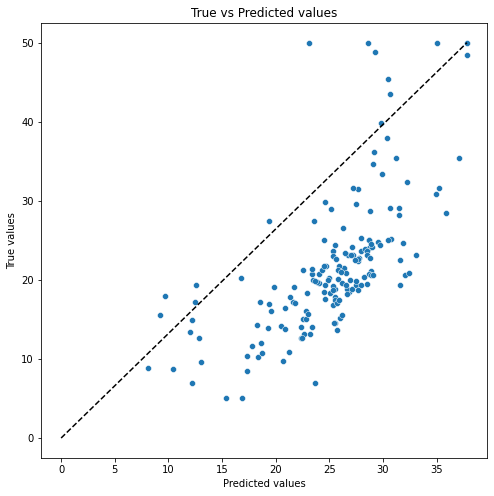

(0.27605, 7.402, 54.787)

In [30]:
evaluate_preds(y_test, y_pred_test.copy().flatten() )

# Варьируем количество нейронов, слоёв и прочее

In [38]:
model_1 = models.Sequential()
model_1.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(1))

model_2 = models.Sequential()
model_2.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_2.add(layers.Dense(1))

model_3 = models.Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1))

model_4 = models.Sequential()
model_4.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(1))

In [39]:
l = [2, 1, 5, 10]
i = 0

res_list = []

for model in [model_1, model_2, model_3, model_4]:

  res = {}

  model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


  res['l'] = l[i]
  i += 1
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)


In [18]:
from pprint import pprint

In [40]:
pprint(res_list)

[{'l': 2, 'mse': 46.89845, 'r2': 0.38029, 'rmse': 6.84824},
 {'l': 1, 'mse': 52.51999, 'r2': 0.30601, 'rmse': 7.24707},
 {'l': 5, 'mse': 56.71774, 'r2': 0.25054, 'rmse': 7.53112},
 {'l': 10, 'mse': 47.93904, 'r2': 0.36654, 'rmse': 6.9238}]


2 слоя оптимальнее, чем 1 или 5, 10 совсем плохо

In [44]:
res_list = []

for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:

  res = {}

  model_n = models.Sequential()
  model_n.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
  model_n.add(layers.Dense(n, activation='relu'))
  model_n.add(layers.Dense(1))

  model_n.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model_n.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model_n.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


  res['n'] = n
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)


In [45]:
pprint(res_list)

[{'mse': 806.36053, 'n': 1, 'r2': -9.65508, 'rmse': 28.39649},
 {'mse': 3296.76469, 'n': 2, 'r2': -42.56276, 'rmse': 57.41746},
 {'mse': 6809.33559, 'n': 4, 'r2': -88.97714, 'rmse': 82.5187},
 {'mse': 2129.46278, 'n': 8, 'r2': -27.13828, 'rmse': 46.1461},
 {'mse': 183.25785, 'n': 16, 'r2': -1.42153, 'rmse': 13.53728},
 {'mse': 87.79199, 'n': 32, 'r2': -0.16007, 'rmse': 9.36974},
 {'mse': 69.64467, 'n': 64, 'r2': 0.07973, 'rmse': 8.34534},
 {'mse': 53.21656, 'n': 128, 'r2': 0.29681, 'rmse': 7.29497},
 {'mse': 54.02212, 'n': 256, 'r2': 0.28616, 'rmse': 7.34997},
 {'mse': 59.4904, 'n': 512, 'r2': 0.21391, 'rmse': 7.713},
 {'mse': 49.63074, 'n': 1024, 'r2': 0.34419, 'rmse': 7.04491},
 {'mse': 67.1237, 'n': 2048, 'r2': 0.11304, 'rmse': 8.19291}]


1024 нейрноа - оптимальнее

# Типы оптимизаторов

In [20]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:

  res = {}

  model_o = models.Sequential()
  model_o.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
  model_o.add(layers.Dense(1024, activation='relu'))
  model_o.add(layers.Dense(1))

  model_o.compile(optimizer=opt,
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model_o.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model_o.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)
  #print(y_pred_test)

  res['o'] = opt
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)

In [21]:
pprint(res_list)

[{'mse': 49.28974, 'o': 'adam', 'r2': 0.3487, 'rmse': 7.02067},
 {'mse': 293.86982, 'o': 'RMSprop', 'r2': -2.88313, 'rmse': 17.14263},
 {'mse': 55.38958, 'o': 'Ftrl', 'r2': 0.26809, 'rmse': 7.44242},
 {'mse': 57.32117, 'o': 'Nadam', 'r2': 0.24257, 'rmse': 7.57107},
 {'mse': 62.62362, 'o': 'Adamax', 'r2': 0.1725, 'rmse': 7.91351}]


'adam' - лучше

# Большой тест всего со всем

In [23]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:
  for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
    for metrics in ['mean_absolute_error', 'mean_squared_error']:
      for loss in [tf.keras.losses.MeanSquaredError(), tf.keras.losses.MeanAbsoluteError()]:
        model_1 = models.Sequential()
        model_1.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_1.add(layers.Dense(n, activation='relu'))
        model_1.add(layers.Dense(1))

        model_2 = models.Sequential()
        model_2.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_2.add(layers.Dense(1))

        model_3 = models.Sequential()
        model_3.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(1))

        model_4 = models.Sequential()
        model_4.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(1))

        l = [2, 1, 5, 10]
        i = 0

        for model in [model_1, model_2, model_3, model_4]:

          res = {}

          model.compile(optimizer='adam',
                      loss=loss,
                      metrics=metrics)
          
          model.fit(X_train, y_train, epochs=5,
                      verbose = False)
          y_pred_test = model.predict(X_test)

          #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


          res['l'] = l[i]
          res['n'] = n
          res['opt'] = opt
          res['metrics'] = metrics
          res['loss'] = loss
          i += 1
          res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
          res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
          res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

          print(res)

          res_list.append(res)

{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f5b783bbd30>, 'r2': -6.15868, 'rmse': 23.2757, 'mse': 541.75827}
{'l': 1, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f5b783bbd30>, 'r2': -0.3158, 'rmse': 9.97888, 'mse': 99.57799}
{'l': 5, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f5b783bbd30>, 'r2': -6.15869, 'rmse': 23.27571, 'mse': 541.75864}
{'l': 10, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f5b783bbd30>, 'r2': -6.15868, 'rmse': 23.27571, 'mse': 541.75848}
{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f5b783bbd68>, 'r2': -6.15858, 'rmse': 23.27555, 'mse': 541

In [24]:
import pandas as pd

In [28]:
df = pd.DataFrame(res_list)

In [33]:
df.sort_values(by='r2', ascending=False).head(10)

,l,n,opt,metrics,loss,r2,rmse,mse
569,1,2048,Ftrl,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.53451,5.93530,35.22773
353,1,1024,RMSprop,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.50062,6.14757,37.79262
749,1,1024,Nadam,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.49447,6.18530,38.25794
381,1,2048,RMSprop,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.49020,6.21137,38.58106
949,1,2048,Adamax,mean_absolute_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.48889,6.21932,38.68000
157,1,512,adam,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.48823,6.22337,38.73030
757,1,2048,Nadam,mean_absolute_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.48562,6.23922,38.92785
177,1,2048,adam,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.47995,6.27350,39.35676
909,1,256,Adamax,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.47817,6.28422,39.49138
288,2,64,RMSprop,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.47793,6.28565,39.50944


Забавный, но кажущийся адекватным вывод - при разных настройках есть разные успешные комибнации.

Правда не тестировалость количество эпох... 

Но и так много времени занимает.